https://www.kaggle.com/c/whale-categorization-playground/kernels

In [14]:
!pip install tqdm
!pip install kaggle
!mkdir -p /root/.kaggle
!wget https://www.dropbox.com/s/c9i2x0m44hlv2q8/kaggle.json
!mv kaggle.json /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

--2018-11-05 08:33:52--  https://www.dropbox.com/s/c9i2x0m44hlv2q8/kaggle.json
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/c9i2x0m44hlv2q8/kaggle.json [following]
--2018-11-05 08:33:52--  https://www.dropbox.com/s/raw/c9i2x0m44hlv2q8/kaggle.json
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7d7ea8328238883081c7672d6e.dl.dropboxusercontent.com/cd/0/inline/AUwqSNM_rlOHlAuoSsUiGf2HocTeDtmsSYqPuA9L2ZWVUr6pe_sv_Vn5aw00lxQ0ZOU2xoSd8HcI1V85UgM3WjllDHUaQ7J4VzFmkUQw4lQsuhpQt7CKGjsq3eyh2QpEfb4Wvcjvvm832tm6soZVfdLl4lkL7csTUMGR2IvFpso8R1gf1jKOttMIFoTreAyZAqg/file [following]
--2018-11-05 08:33:53--  https://uc7d7ea8328238883081c7672d6e.dl.dropboxusercontent.com/cd/0/inline/AUwqSNM_rlOHlAuoSsUiGf2HocTeDtmsSYqPuA9L2ZWVUr6pe_sv_V

In [32]:
!pip install torch==0.4.1
!pip install torchvision==0.2.1
!pip install numpy==1.14.6
!pip install matplotlib==2.1.2
!pip install pillow==5.0.0
!pip install opencv-python==3.4.3.18

    100% |████████████████████████████████| 519.5MB 30kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x59e02000 @  0x7fcc5f3192a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
    100% |████████████████████████████████| 61kB 1.9MB/s 
    100% |████████████████████████████████| 2.0MB 13.7MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 5.9MB 6.4MB/s 
  Found existing installation: Pillow 5.3.0
    Uninstalling Pillow-5.3.0:
      Successfully uninstalled Pillow-5.3.0


In [156]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from PIL import Image
import time
import os
print(torch.cuda.is_available())
device = 'cuda' if torch.cuda.is_available() else 'cpu'

True


In [15]:
# !rm /content/.kaggle/kaggle.json
# !ls /content/.kaggle
!ls /root/.kaggle


kaggle.json


In [18]:
# !rm -rf /content/.kaggle/competitions/data-science-bowl-2018/*
!kaggle competitions download -c whale-categorization-playground

  0% 0.00/960k [00:00<?, ?B/s]
100% 960k/960k [00:00<00:00, 83.4MB/s]
  0% 0.00/221k [00:00<?, ?B/s]
100% 221k/221k [00:00<00:00, 72.3MB/s]
 98% 396M/405M [00:02<00:00, 179MB/s]
100% 405M/405M [00:02<00:00, 175MB/s]
 95% 246M/260M [00:02<00:00, 132MB/s]
100% 260M/260M [00:02<00:00, 120MB/s]


In [23]:
!ls 

sample_data  sample_submission.csv  test.zip  train.csv  train.zip


In [24]:
!unzip train.zip

Archive:  train.zip
   creating: train/
  inflating: train/84da76f5.jpg      
  inflating: train/d5c9c1f2.jpg      
  inflating: train/943cb663.jpg      
  inflating: train/906c534e.jpg      
  inflating: train/cca9cd4e.jpg      
  inflating: train/dabfedb4.jpg      
  inflating: train/07b8b278.jpg      
  inflating: train/c3b79ec4.jpg      
  inflating: train/a549a05f.jpg      
  inflating: train/d87e29dc.jpg      
  inflating: train/dfee01f1.jpg      
  inflating: train/74861c16.jpg      
  inflating: train/6ee9e357.jpg      
  inflating: train/0caa3541.jpg      
  inflating: train/fff04277.jpg      
  inflating: train/d2796dc6.jpg      
  inflating: train/cd656086.jpg      
  inflating: train/04a91387.jpg      
  inflating: train/374aaece.jpg      
  inflating: train/eef1c346.jpg      
  inflating: train/3b4495e4.jpg      
  inflating: train/1d35c098.jpg      
  inflating: train/f87447c6.jpg      
  inflating: train/c87be503.jpg      
  inflating: train/345382b4.jpg      
  inflatin

In [54]:
!unzip test.zip

Archive:  test.zip
   creating: test/
  inflating: test/c55a35a7.jpg       
  inflating: test/7f48832c.jpg       
  inflating: test/28d4e63b.jpg       
  inflating: test/3a2310b3.jpg       
  inflating: test/c779125a.jpg       
  inflating: test/bd26dddf.jpg       
  inflating: test/dbbcc754.jpg       
  inflating: test/9045302f.jpg       
  inflating: test/ed2db5ae.jpg       
  inflating: test/cbd5ac86.jpg       
  inflating: test/53cd0f31.jpg       
  inflating: test/513da9dc.jpg       
  inflating: test/f3d633e0.jpg       
  inflating: test/b558ef5b.jpg       
  inflating: test/0372c7d4.jpg       
  inflating: test/7275e6ad.jpg       
  inflating: test/63cb943a.jpg       
  inflating: test/048512e2.jpg       
  inflating: test/8c3282a1.jpg       
  inflating: test/65d9a84d.jpg       
  inflating: test/3273f6a7.jpg       
  inflating: test/618be8d2.jpg       
  inflating: test/eb71a504.jpg       
  inflating: test/8c411469.jpg       
  inflating: test/4505e616.jpg       
  inflating:

In [56]:
!tail -n 20 train.csv

ff6d6894.jpg,w_b426ff3
ff7247f6.jpg,w_41afa58
ff8b2ad0.jpg,w_0f20cbc
ff92447f.jpg,w_372ae75
ff9d60a3.jpg,w_eb0a6ed
ffa6b9ac.jpg,w_edf5f77
ffa78ccc.jpg,w_89d9c03
ffb71ac2.jpg,new_whale
ffbaa734.jpg,w_a190b3b
ffbca206.jpg,w_73b26b7
ffc0b437.jpg,w_ace8c54
ffc6986f.jpg,w_fce6ab2
ffcfd124.jpg,w_41a260a
ffd01d82.jpg,w_6249155
ffd1e7aa.jpg,new_whale
ffe5c306.jpg,w_2ceab05
ffeaa7a4.jpg,w_b067417
ffecec63.jpg,w_8b56cb1
fff04277.jpg,w_2dcbf82
fffd4260.jpg,w_b9bfd4e


In [51]:
!tail -n 5 sample_submission.csv

fff31d26.jpg,new_whale w_1287fbc w_98baff9 w_7554f44 w_1eafe46
fff3d049.jpg,new_whale w_1287fbc w_98baff9 w_7554f44 w_1eafe46
fffa5100.jpg,new_whale w_1287fbc w_98baff9 w_7554f44 w_1eafe46
fffa6215.jpg,new_whale w_1287fbc w_98baff9 w_7554f44 w_1eafe46
ffffdd7f.jpg,new_whale w_1287fbc w_98baff9 w_7554f44 w_1eafe46


In [53]:
!ls train | tail -n 5

ffe5c306.jpg
ffeaa7a4.jpg
ffecec63.jpg
fff04277.jpg
fffd4260.jpg


<PIL.Image.Image image mode=RGB size=1050x600 at 0x7F3F49F61B70>


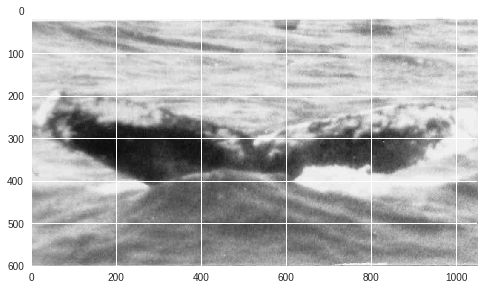

In [157]:

from PIL import Image
image = "./train/336cf135.jpg"
with open(image, 'rb') as f:
    image = Image.open(f)
    image = image.convert('RGB')
print(image)
plt.imshow(image)
plt.show()

<PIL.Image.Image image mode=RGB size=1050x525 at 0x7F3F45316E48>


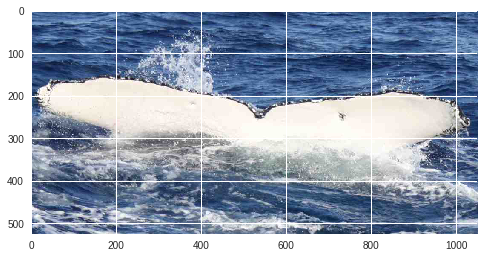

In [158]:

from PIL import Image
image = "./train/6884780e.jpg"
with open(image, 'rb') as f:
    image = Image.open(f)
    image = image.convert('RGB')
print(image)
plt.imshow(image)
plt.show()

In [0]:
#正規化をしない前処理
to_tensor_transforms = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])

train/hoge.jpg    
train/hoge.jpg    
train/hoge.jpg    
test/hoge.jpg    
test/hoge.jpg    
test/hoge.jpg    

==============    
train.csv    

ffe5c306.jpg,w_2ceab05    
ffeaa7a4.jpg,w_b067417    
ffecec63.jpg,w_8b56cb1    
fff04277.jpg,w_2dcbf82    
fffd4260.jpg,w_b9bfd4e    
ffd1e7aa.jpg,new_whale    


# データ数

In [160]:
train = os.listdir("train")
print("training ", len(train))

test = os.listdir("test")
print("test ", len(test))

training  9850
test  15610


# CSVにあるデータがフォルダ以下にあるかチェック

In [161]:
import os
import glob
file_path = "train/*.jpg"
for file in glob.glob(file_path):
  print(os.path.basename(file))
  break



37fdd717.jpg


In [162]:
import pandas as pd

df = pd.read_csv('train.csv')
print(df.head())

          Image         Id
0  00022e1a.jpg  w_e15442c
1  000466c4.jpg  w_1287fbc
2  00087b01.jpg  w_da2efe0
3  001296d5.jpg  w_19e5482
4  0014cfdf.jpg  w_f22f3e3


In [163]:
df.Image[:10]

0    00022e1a.jpg
1    000466c4.jpg
2    00087b01.jpg
3    001296d5.jpg
4    0014cfdf.jpg
5    0025e8c2.jpg
6    0026a8ab.jpg
7    0031c258.jpg
8    0035632e.jpg
9    0037e7d3.jpg
Name: Image, dtype: object

In [164]:
type(df.Image[:10])

pandas.core.series.Series

In [165]:
df.Image.tolist()[:10]

['00022e1a.jpg',
 '000466c4.jpg',
 '00087b01.jpg',
 '001296d5.jpg',
 '0014cfdf.jpg',
 '0025e8c2.jpg',
 '0026a8ab.jpg',
 '0031c258.jpg',
 '0035632e.jpg',
 '0037e7d3.jpg']

In [166]:
df.Id[:10]

0    w_e15442c
1    w_1287fbc
2    w_da2efe0
3    w_19e5482
4    w_f22f3e3
5    w_8b1ca89
6    w_eaad6a8
7    new_whale
8    w_3d0bc7a
9    w_50db782
Name: Id, dtype: object

In [0]:
for file in glob.glob(file_path):
  file = os.path.basename(file)
  if file not in df.Image.tolist():
    print("csvにない画像データを発見！ ", file)
  
#   break

In [0]:
file_list = glob.glob(file_path)
file_list = [os.path.basename(file) for file in file_list]

for file in df.Image.tolist():
  if file not in file_list:
    print("画像フォルダにない画像データを発見！ ", file)
  
#   break

不整合のデータはない。

# データ偏りチェック

In [169]:
#クラス数
classes = set(df.Id.tolist())
print(list(classes)[:5])
print(len(classes))
print(type(classes))

['w_54c00ad', 'w_82bb763', 'w_0d2dc7e', 'w_b1f6e70', 'w_2863d51']
4251
<class 'set'>


In [170]:
import collections
id_collections = collections.Counter(df.Id.tolist())
print(id_collections)

Counter({'new_whale': 810, 'w_1287fbc': 34, 'w_98baff9': 27, 'w_7554f44': 26, 'w_1eafe46': 23, 'w_fd1cb9d': 22, 'w_693c9ee': 22, 'w_ab4cae2': 22, 'w_73d5489': 21, 'w_43be268': 21, 'w_987a36f': 21, 'w_f19faeb': 20, 'w_9b401eb': 19, 'w_95874a5': 19, 'w_c0d494d': 18, 'w_b7d5069': 18, 'w_dbda0d6': 17, 'w_eb0a6ed': 17, 'w_0e737d0': 17, 'w_18eee6e': 17, 'w_67de30b': 16, 'w_6c803bf': 16, 'w_a59905f': 16, 'w_b0e05b1': 16, 'w_17ee910': 16, 'w_cae7677': 15, 'w_89e159a': 15, 'w_9ca943b': 15, 'w_ee17a08': 15, 'w_8c1ec28': 14, 'w_b074cdf': 14, 'w_7e8b270': 14, 'w_2d99a0c': 14, 'w_540fd73': 14, 'w_9ea2cc3': 13, 'w_6202983': 13, 'w_f8e6546': 13, 'w_4e52a49': 13, 'w_fba3bde': 13, 'w_bb2d34d': 13, 'w_4b7b80b': 13, 'w_fe49bc4': 13, 'w_44cccf6': 13, 'w_7c7a78c': 12, 'w_c9e1cdc': 12, 'w_b678944': 12, 'w_2071a4c': 12, 'w_49bbc79': 12, 'w_7b035cc': 12, 'w_b9e00eb': 12, 'w_da2efe0': 11, 'w_b942708': 11, 'w_3d66298': 11, 'w_8c1e2e4': 11, 'w_7311fe4': 11, 'w_a254eb0': 11, 'w_e826a6f': 11, 'w_3d0bc7a': 10, 'w_4

In [171]:
id_collections["new_whale"]

810

In [172]:
#頻度が多いクラスと少ないクラスを省いてる
sorted_id_collections = dict(sorted(id_collections.items(), key=lambda pair: pair[1], reverse=True)[1:2000])
sorted_id_collections

{'w_1287fbc': 34,
 'w_98baff9': 27,
 'w_7554f44': 26,
 'w_1eafe46': 23,
 'w_fd1cb9d': 22,
 'w_693c9ee': 22,
 'w_ab4cae2': 22,
 'w_73d5489': 21,
 'w_43be268': 21,
 'w_987a36f': 21,
 'w_f19faeb': 20,
 'w_9b401eb': 19,
 'w_95874a5': 19,
 'w_c0d494d': 18,
 'w_b7d5069': 18,
 'w_dbda0d6': 17,
 'w_eb0a6ed': 17,
 'w_0e737d0': 17,
 'w_18eee6e': 17,
 'w_67de30b': 16,
 'w_6c803bf': 16,
 'w_a59905f': 16,
 'w_b0e05b1': 16,
 'w_17ee910': 16,
 'w_cae7677': 15,
 'w_89e159a': 15,
 'w_9ca943b': 15,
 'w_ee17a08': 15,
 'w_8c1ec28': 14,
 'w_b074cdf': 14,
 'w_7e8b270': 14,
 'w_2d99a0c': 14,
 'w_540fd73': 14,
 'w_9ea2cc3': 13,
 'w_6202983': 13,
 'w_f8e6546': 13,
 'w_4e52a49': 13,
 'w_fba3bde': 13,
 'w_bb2d34d': 13,
 'w_4b7b80b': 13,
 'w_fe49bc4': 13,
 'w_44cccf6': 13,
 'w_7c7a78c': 12,
 'w_c9e1cdc': 12,
 'w_b678944': 12,
 'w_2071a4c': 12,
 'w_49bbc79': 12,
 'w_7b035cc': 12,
 'w_b9e00eb': 12,
 'w_da2efe0': 11,
 'w_b942708': 11,
 'w_3d66298': 11,
 'w_8c1e2e4': 11,
 'w_7311fe4': 11,
 'w_a254eb0': 11,
 'w_e826a6

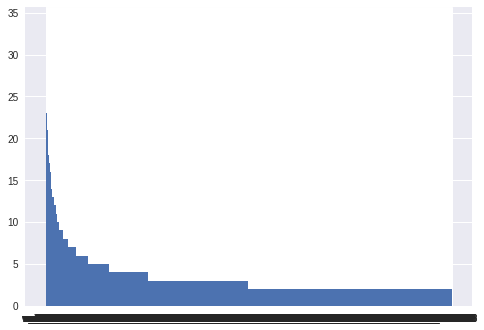

In [173]:
labels, values = zip(*sorted_id_collections.items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

# ラベル番号のデータを作る

In [174]:
df.Id.unique()

array(['w_e15442c', 'w_1287fbc', 'w_da2efe0', ..., 'w_6249155',
       'w_2ceab05', 'w_b9bfd4e'], dtype=object)

In [175]:
#classesの中身もユニークなのでclassesでも良い
label = {}
for i, c in enumerate(classes):
  label[c] = i

label

{'w_54c00ad': 0,
 'w_82bb763': 1,
 'w_0d2dc7e': 2,
 'w_b1f6e70': 3,
 'w_2863d51': 4,
 'w_883b284': 5,
 'w_d521332': 6,
 'w_212b985': 7,
 'w_0d8fb3f': 8,
 'w_13f8407': 9,
 'w_0caa554': 10,
 'w_2196938': 11,
 'w_c0daf38': 12,
 'w_77ee0be': 13,
 'w_c35b3ae': 14,
 'w_3c27f42': 15,
 'w_57c14db': 16,
 'w_7e9dc07': 17,
 'w_ad3dd0b': 18,
 'w_498bf0d': 19,
 'w_ad8bc47': 20,
 'w_52b0438': 21,
 'w_c20f21c': 22,
 'w_2707bcd': 23,
 'w_26f9f95': 24,
 'w_59461a4': 25,
 'w_fa121c9': 26,
 'w_dad56c9': 27,
 'w_85cdd9b': 28,
 'w_f81c626': 29,
 'w_41cd8bc': 30,
 'w_3026ce2': 31,
 'w_e3f51ec': 32,
 'w_824f286': 33,
 'w_8691e58': 34,
 'w_2687f1b': 35,
 'w_9741f42': 36,
 'w_43b50e5': 37,
 'w_ec38983': 38,
 'w_7dee51b': 39,
 'w_1905c66': 40,
 'w_0f00e71': 41,
 'w_3090f78': 42,
 'w_88e5933': 43,
 'w_64830fa': 44,
 'w_6ab7b53': 45,
 'w_b5fc897': 46,
 'w_cbd49f8': 47,
 'w_030294d': 48,
 'w_c0d494d': 49,
 'w_dff2982': 50,
 'w_52c1af6': 51,
 'w_ded09c7': 52,
 'w_b0a5c8d': 53,
 'w_2ce5ce2': 54,
 'w_42ab867': 55,
 '

In [0]:
# dict(id_collections)

In [177]:
#idにする。pandas.Serise.mapはすげー便利なのでは。
#>.map()メソッドに {変化させたいラベル:対応する値} の辞書を渡してあげれば良い.
#https://ykm11.hatenablog.com/entry/2018/06/01/195259

df["label"] = df.Id.map(dict(label))
df.head()

,Image,Id,label
0,00022e1a.jpg,w_e15442c,1269
1,000466c4.jpg,w_1287fbc,3272
2,00087b01.jpg,w_da2efe0,3249
3,001296d5.jpg,w_19e5482,2673
4,0014cfdf.jpg,w_f22f3e3,935


In [178]:
df.head(20)

,Image,Id,label
0,00022e1a.jpg,w_e15442c,1269
1,000466c4.jpg,w_1287fbc,3272
2,00087b01.jpg,w_da2efe0,3249
3,001296d5.jpg,w_19e5482,2673
4,0014cfdf.jpg,w_f22f3e3,935
5,0025e8c2.jpg,w_8b1ca89,2596
6,0026a8ab.jpg,w_eaad6a8,2053
7,0031c258.jpg,new_whale,678
8,0035632e.jpg,w_3d0bc7a,1508
9,0037e7d3.jpg,w_50db782,4011


In [179]:
#この二つのデータを使用する
print(df.Image[:5])
print(df.label[:5])

0    00022e1a.jpg
1    000466c4.jpg
2    00087b01.jpg
3    001296d5.jpg
4    0014cfdf.jpg
Name: Image, dtype: object
0    1269
1    3272
2    3249
3    2673
4     935
Name: label, dtype: int64


In [0]:
root = './'
class CustomDataset(torch.utils.data.Dataset):  
  
    def __init__(self, root, transform=None, train=True):
        # 指定する場合は前処理クラスを受け取ります。
        self.transform = transform
        # 画像とラベルの一覧を保持するリスト
        self.images = []
        self.labels = []
        # ルートフォルダーパス
        root = "./"
        # 訓練の場合と検証の場合でフォルダわけ
        # 画像を読み込むファイルパスを取得します。
        if train == True:
            root_path = os.path.join(root, 'train')
        else:
            root_path = os.path.join(root, 'test')
        # 画像一覧を取得します。
        self.images = df.Image.tolist()
        self.images = [os.path.join(root_path, file) for file in self.images]
        self.labels = df.label.tolist()        

    def __getitem__(self, index):
        # インデックスを元に画像のファイルパスとラベルを取得します。
        image = self.images[index]
        label = self.labels[index]
        # 画像ファイルパスから画像を読み込みます。
        with open(image, 'rb') as f:
            image = Image.open(f)
            image = image.convert('RGB')
        # 前処理がある場合は前処理をいれます。
        if self.transform is not None:
            image = self.transform(image)
        # 画像とラベルのペアを返却します。
        return image, label
        
    def __len__(self):
        # ここにはデータ数を指定します。
        return len(self.images)

[1033 3459  807 3674 2236]


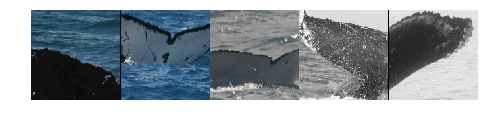

In [181]:
# 訓練データのプロット
custom_dataset = CustomDataset(root, to_tensor_transforms, train=True)
custom_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=5, 
                                           shuffle=True)

def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

for i, (images, labels) in enumerate(custom_loader):
    print(labels.numpy())
    show(torchvision.utils.make_grid(images, padding=1))
    plt.axis('off')
    
    break

[2845 1656 2598 3392 3301]


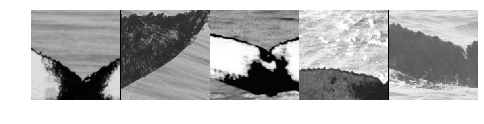

In [182]:
# テストデータのプロット
custom_dataset = CustomDataset(root, to_tensor_transforms)
custom_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=5, 
                                           shuffle=True)

def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

for i, (images, labels) in enumerate(custom_loader):
    print(labels.numpy())
    show(torchvision.utils.make_grid(images, padding=1))
    plt.axis('off')
    
    break

[ 678 1889 2984 2399 3219 1645  678 2923 1908 2324  725  757 3939 1132
  247 2021 3531 2231 4201 3874 1656 3862 2728 1047  678 3695 3391  371
 3083 3416 3584 1072 3026 1140 3625 2877 2411  836 3840 3682 2265   62
 1219 3344  777 3011 1922 2023 2337 2131 1381  591 3600 3216 2257  960]


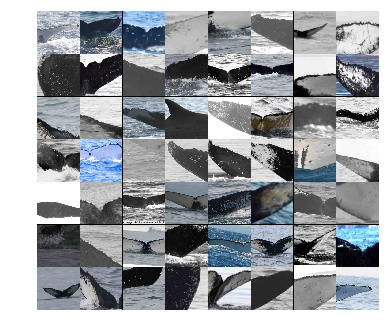

In [183]:
# 訓練データのプロット
custom_dataset = CustomDataset(root, to_tensor_transforms, train=True)
custom_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=56,  #いっぱい表示
                                           shuffle=True)

def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

for i, (images, labels) in enumerate(custom_loader):
    print(labels.numpy())
    show(torchvision.utils.make_grid(images, padding=1))
    plt.axis('off')
    
    break

[4212 2096  625 2580 1597 4061  399  578 3894 3654 1083  592 1887 3427
 2545 2103  678 2141 3800  363  678 2777  591 2897 1192   46  667 1315
  678 3072 2219  282  463 2888 3524 3388  330 1434  481 1343 1241 2610
 2575  828  678 2672 3080 2610 1468 1063 2095  936 2961 1447  560 2281]


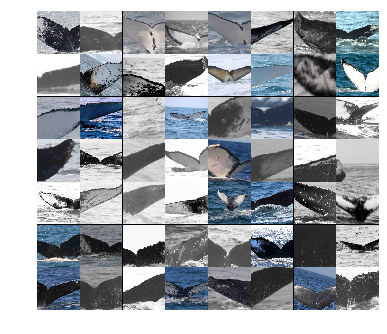

In [184]:
# テストデータのプロット
custom_dataset = CustomDataset(root, to_tensor_transforms)
custom_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=56, 
                                           shuffle=True)

def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

for i, (images, labels) in enumerate(custom_loader):
    print(labels.numpy())
    show(torchvision.utils.make_grid(images, padding=1))
    plt.axis('off')
    
    break

In [0]:
#画像の前処理を定義
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [186]:
# 定義したDatasetとDataLoaderを使います。
custom_train_dataset = CustomDataset(root, data_transforms["train"], train=True)
train_loader = torch.utils.data.DataLoader(dataset=custom_train_dataset,
                                           batch_size=64, 
                                           shuffle=True)
custom_test_dataset = CustomDataset(root, data_transforms["test"])
test_loader = torch.utils.data.DataLoader(dataset=custom_test_dataset,
                                           batch_size=64, 
                                           shuffle=False)

for i, (images, labels) in enumerate(train_loader):
    print(images.size())
    print(images[0].size())    
    print(labels[0].item())
    #ここに訓練などの処理をきます。
    break

torch.Size([64, 3, 224, 224])
torch.Size([3, 224, 224])
2924


In [187]:
#全結合の次元を計算
size_check = torch.FloatTensor(10, 3, 224, 224)
features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
#バッチサイズ10, 6×6のフィルターが256枚
#10バッチは残して、6×6×256を１次元に落とす=>6×6×256=9216
print(features(size_check).size())
#バッチ１０の値を軸にして残りの次元を１次元へ落とした場合のTensorの形状をチェックすると9216。
print(features(size_check).view(size_check.size(0), -1).size())
#fc_sizeを全結合の形状として保持しておく
fc_size = features(size_check).view(size_check.size(0), -1).size()[1]
print(fc_size)

torch.Size([10, 256, 6, 6])
torch.Size([10, 9216])
9216


In [0]:
#クラス数
num_classes = len(classes)

class AlexNet(nn.Module):
    #fc_sizeを引き渡す
    def __init__(self, num_classes, fc_size):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        #fc_sizeで計算した形状を指定
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(fc_size, 4096), 
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = AlexNet(num_classes, fc_size).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

In [189]:
net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

In [155]:
num_epochs = 100

train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

for epoch in range(num_epochs):
    train_loss = 0
    train_acc = 0
    val_loss = 0
    val_acc = 0
    
    #train
    net.train()
    for i, (images, labels) in enumerate(train_loader):
      images, labels = images.to(device), labels.to(device)
      
      optimizer.zero_grad()
      outputs = net(images)
      loss = criterion(outputs, labels)
      train_loss += loss.item()
      train_acc += (outputs.max(1)[1] == labels).sum().item()
      loss.backward()
      optimizer.step()
    
    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_acc / len(train_loader.dataset)
    
    #val
    net.eval()
    with torch.no_grad():
      for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        val_acc += (outputs.max(1)[1] == labels).sum().item()
    avg_val_loss = val_loss / len(test_loader.dataset)
    avg_val_acc = val_acc / len(test_loader.dataset)
    
    print ('Epoch [{}/{}], Loss: {loss:.4f}, val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}' 
                   .format(epoch+1, num_epochs, i+1, loss=avg_train_loss, val_loss=avg_val_loss, val_acc=avg_val_acc))
    train_loss_list.append(avg_train_loss)
    train_acc_list.append(avg_train_acc)
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(avg_val_acc)

Epoch [1/100], Loss: 0.1293, val_loss: 0.1287, val_acc: 0.0822
Epoch [2/100], Loss: 0.1258, val_loss: 0.1235, val_acc: 0.0822
Epoch [3/100], Loss: 0.1228, val_loss: 0.1209, val_acc: 0.0822
Epoch [4/100], Loss: 0.1217, val_loss: 0.1205, val_acc: 0.0822
Epoch [5/100], Loss: 0.1213, val_loss: 0.1203, val_acc: 0.0822
Epoch [6/100], Loss: 0.1210, val_loss: 0.1200, val_acc: 0.0822
Epoch [7/100], Loss: 0.1208, val_loss: 0.1199, val_acc: 0.0822
Epoch [8/100], Loss: 0.1206, val_loss: 0.1200, val_acc: 0.0822
Epoch [9/100], Loss: 0.1204, val_loss: 0.1196, val_acc: 0.0822
Epoch [10/100], Loss: 0.1202, val_loss: 0.1192, val_acc: 0.0822
Epoch [11/100], Loss: 0.1201, val_loss: 0.1191, val_acc: 0.0822
Epoch [12/100], Loss: 0.1198, val_loss: 0.1187, val_acc: 0.0822
Epoch [13/100], Loss: 0.1196, val_loss: 0.1186, val_acc: 0.0822
Epoch [14/100], Loss: 0.1192, val_loss: 0.1189, val_acc: 0.0822
Epoch [15/100], Loss: 0.1189, val_loss: 0.1172, val_acc: 0.0822
Epoch [16/100], Loss: 0.1184, val_loss: 0.1169, v

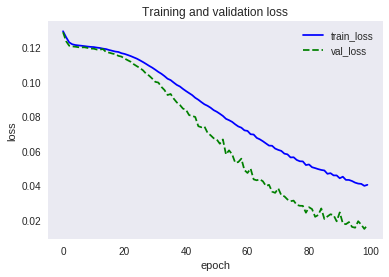

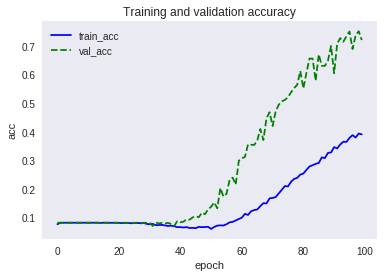

In [190]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(range(num_epochs), train_loss_list, color='blue', linestyle='-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, color='green', linestyle='--', label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.grid()

plt.figure()
plt.plot(range(num_epochs), train_acc_list, color='blue', linestyle='-', label='train_acc')
plt.plot(range(num_epochs), val_acc_list, color='green', linestyle='--', label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Training and validation accuracy')
plt.grid()